In [1]:
# Load Libraries
# Preprocessing and visualization imports
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = 16, 12

#Linear Models
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#Non-linear Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Model performance metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#Model Re-sampling
from sklearn import cross_validation

In [2]:
# Load Dataset
url = "https://goo.gl/mLmoIz"
names = ['sepal-length', 'sepal-width','petal-length','petal-width','class']
dataset = pandas.read_csv(url, names=names)

In [3]:
# Summarize the dataset
print(dataset.shape)

(150, 5)


In [4]:
print (dataset.head(5))

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
#Statistical Summary
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [6]:
#Class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


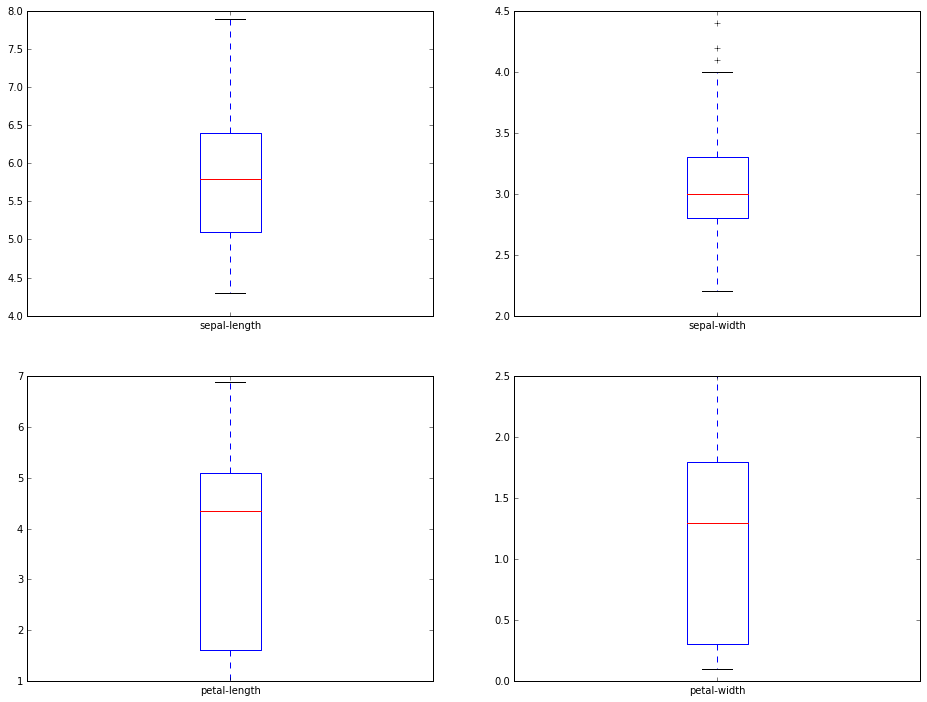

In [7]:
#Data Visualization
#box plot
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

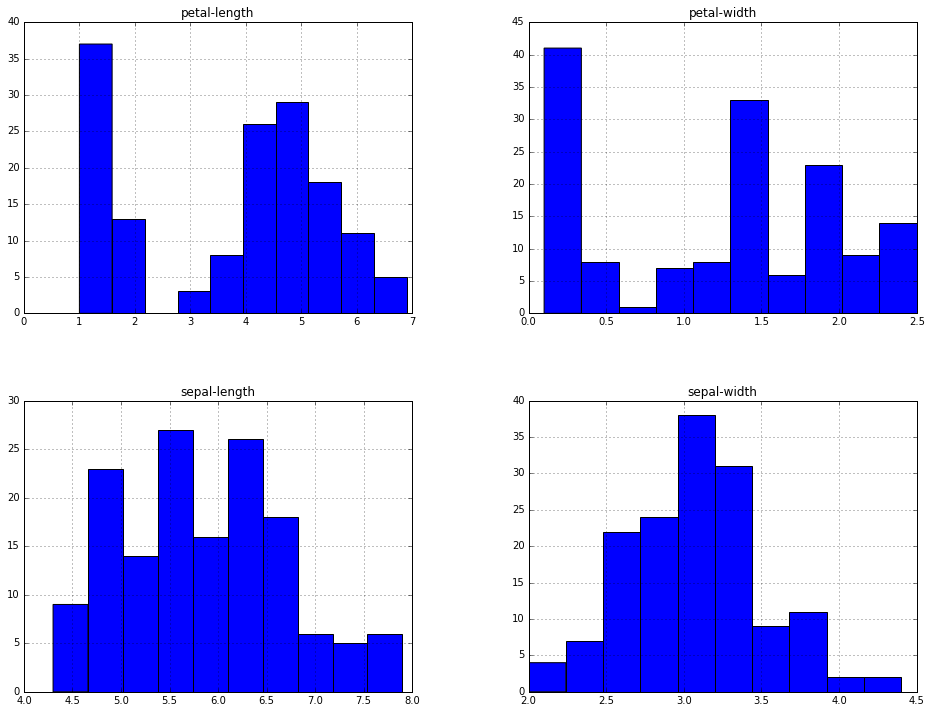

In [8]:
#histogram
dataset.hist()
plt.show()

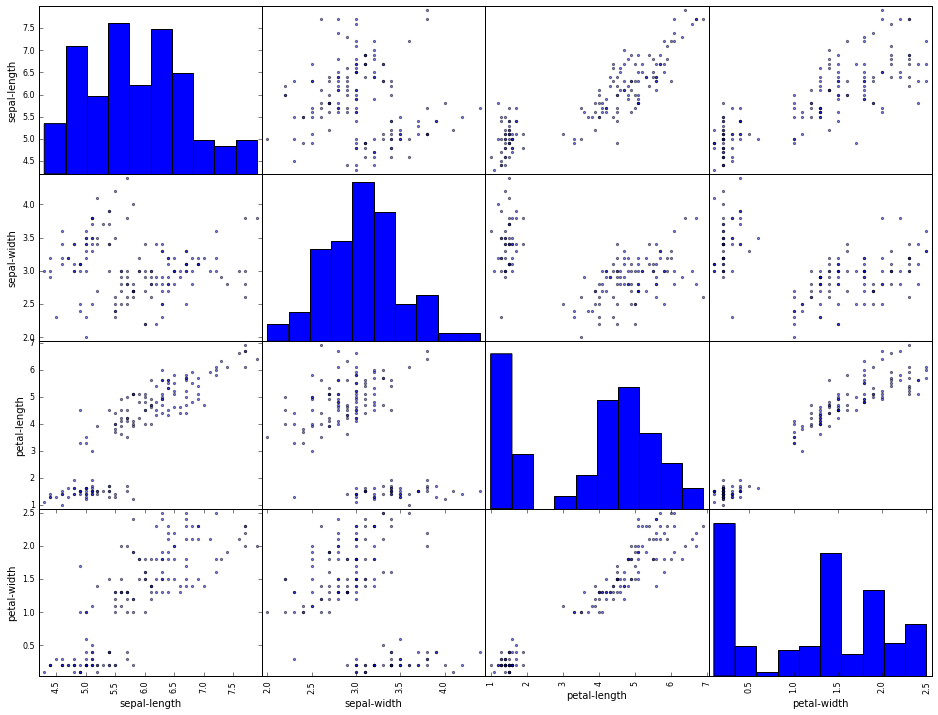

In [9]:
#Scatter plot matrix
scatter_matrix(dataset)
plt.show()

In [10]:
#Evaluate Models
#Validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]

validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size,
                                                                                random_state=seed)

In [11]:
#test harness
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

In [12]:
#Build Models
#Linear - LR, LDA
#Non-Linear - KNN, CART, NB and SVM

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))

results = []
names = []

kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for name, model in models:
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    print(msg)
    print("%s: %r" %(name, cv_results))

LR: 0.966667 (0.040825)
LR: array([ 1.        ,  1.        ,  0.91666667,  1.        ,  1.        ,
        1.        ,  0.91666667,  0.91666667,  0.91666667,  1.        ])
LDA: 0.975000 (0.038188)
LDA: array([ 1.        ,  1.        ,  1.        ,  0.91666667,  1.        ,
        1.        ,  0.91666667,  1.        ,  0.91666667,  1.        ])
KNN: 0.983333 (0.033333)
KNN: array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.91666667,  1.        ,  1.        ,  0.91666667])
CART: 0.966667 (0.040825)
CART: array([ 0.91666667,  1.        ,  1.        ,  0.91666667,  1.        ,
        1.        ,  0.91666667,  1.        ,  0.91666667,  1.        ])
NB: 0.975000 (0.053359)
NB: array([ 1.        ,  1.        ,  1.        ,  0.91666667,  1.        ,
        1.        ,  1.        ,  1.        ,  0.83333333,  1.        ])
SVM: 0.991667 (0.025000)
SVM: array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.91

/home/rahul/projects/ml-scikit-learn/venv/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/home/rahul/projects/ml-scikit-learn/venv/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/home/rahul/projects/ml-scikit-learn/venv/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, preds.size / nrow)
/home/rahul/projects/ml-scikit-learn/venv/lib/python3.5/site-packages/xgboost/core.py:840: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  preds = preds.reshape(nrow, pre

Let's take a look at how the KFold function works:
kfold holds the train and test indices for each test iteration
The test fold of size k, will start at the beginning and works its way to the end of the data sample

In [13]:
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
for i, (train_index, test_index) in enumerate(kfold):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_validation = X[train_index], X[test_index]
    Y_train, Y_validation = Y[train_index], Y[test_index]

TRAIN: [ 12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  24  25  26  27  28  29
  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119] TEST: [12 13 14 15 16 17 18 19 20 21 22 23]
TRAIN: [  0   1   2 

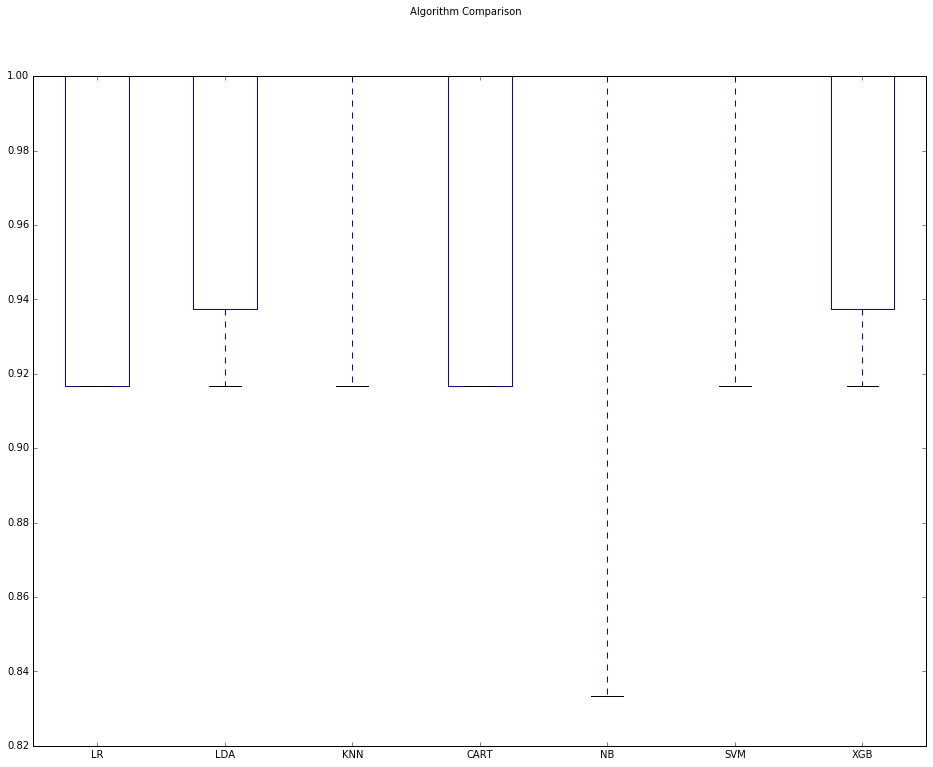

In [14]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
#Make prediction on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

print('kNN')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

#SVM
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)

#print(Y_validation)
#print(predictions)
print('SVM')
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

kNN
0.666666666667
[[0 0]
 [4 8]]
             precision    recall  f1-score   support

Iris-versicolor       0.00      0.00      0.00         0
Iris-virginica       1.00      0.67      0.80        12

avg / total       1.00      0.67      0.80        12

SVM
0.583333333333
[[0 0]
 [5 7]]
             precision    recall  f1-score   support

Iris-versicolor       0.00      0.00      0.00         0
Iris-virginica       1.00      0.58      0.74        12

avg / total       1.00      0.58      0.74        12



/home/rahul/projects/ml-scikit-learn/venv/lib/python3.5/site-packages/sklearn/metrics/classification.py:1076: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
